# Criando uma imagem com brilho, usando OpenCV

Testando a criação de uma imagem que contém uma esfera e ela "emite" uma luz como brilho.

In [631]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

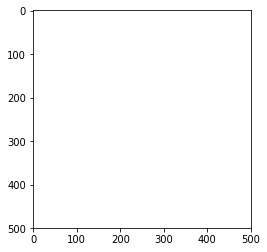

In [632]:
imgWidth, imgHeight = (500, 500)
canais = 4

img = np.zeros(
    [imgWidth,imgHeight,canais], # conjuntos (y), com subconjuntos(x) com quatro valores cada um (RGBA  => BGRA)
    dtype=np.uint8 # do tipo uint8
)
img[:] = 0 # preenche todas as posicoes de todos os arrays com o valor 0
#img[:,:,3] = 0 # preenche a ultima posicao dos arrays internos com o valor 0 (transparencia)
# img
plt.imshow(img)

In [633]:
print(img)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


salvando arquivo de teste

In [634]:
cv2.imwrite('imgTeste.png',img)

True

In [635]:
# criando o tributo de cor para a imagem
corBGRA = (
        150, # valor B (azul)
        120, # valor G (verde)
        100, # valor R (vermelho)
        255 # valor opacidade (entre 0 e 255)
    )

Agora testando a criação de um efeito radial com a mesma cor da esfera.
Mas esta vez, será feito um looping para simular um efeito radial (gradiente)

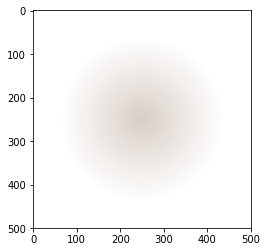

In [636]:
def loopRadial( imagem, corBGRA, tamanhoBrilho=2, intensidade=1 ):
    # definindo inicialmente a cor de opacidade como 0
    corBGRA = list(corBGRA)
    corBGRA[3] = 0; # entre 0 e 255
    
    # continuar daqui
    # a ideia é fazer um for que vai apenas diminuindo o raio do circulo, ou seja
    # como a opacidade será sempre a mesma, a sobreposição fará com que gradualmente fique opaco
    
    # esta função deve ser executada antes, para que o efeito fique por trás da esfera
    raioPrincipalImagem = int( ( imgWidth * 0.25 ) * 0.5 ) # tamanho da imagem opaca
    raioExternoBrilho = ( raioPrincipalImagem * tamanhoBrilho ) + raioPrincipalImagem
    
    
    # desenhando até chegar ao centro
    for camada in range(0,imagem[0].size):
        
        raioExternoBrilho = int( raioExternoBrilho - ( imagem[0].size / (imgWidth)) )
        corBGRA[3] = corBGRA[3] + intensidade;
        
        if( corBGRA[3] > 255 ):
            corBGRA[3] = 255
        
        if( raioExternoBrilho >= 1 ):
            cv2.circle(
                imagem, # imagem base
                (int(imgWidth * 0.5), int(imgHeight * 0.5)), # centro y e centro x
                ( raioExternoBrilho ), # raio em pixels
                corBGRA,
                cv2.FILLED, # tipo de linha, neste caso é totalmente preenchido
                1 # valor negativo do thickness, indica que é para desenhar o circulo com preenchimento
            )
    
    return imagem
    
# executando
img = loopRadial(imagem=img, corBGRA=corBGRA, tamanhoBrilho=2, intensidade=2) # o tamanho do brilho define 
                                                         # quantas vezes o tamanho da esfera

# testando saida
plt.imshow(img)

Testando agora um incremendo na mesma imagem, adicionando um circulo

In [637]:
cv2.circle(
    img, # imagem base
    (int(imgWidth * 0.5), int(imgHeight * 0.5)), # centro y e centro x
    ( int( ( imgWidth * 0.25 ) * 0.5 ) ), # raio em pixels
    corBGRA,
    cv2.FILLED, # tipo de linha, neste caso é totalmente preenchido
    1 # valor negativo do thickness, indica que é para desenhar o circulo com preenchimento
)

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [638]:
cv2.imwrite('imgTeste.png',img)

True

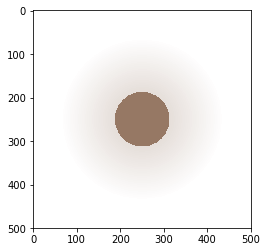

In [639]:
plt.imshow(img)

Pegando a imagem e aplicando uma matriz mametática kernel de suavização "smooth", que é o mesmo que um blur

In [640]:
kernel = np.ones((5,5), np.float32)/25
#img = cv2.filter2D(img,-1,kernel)

kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

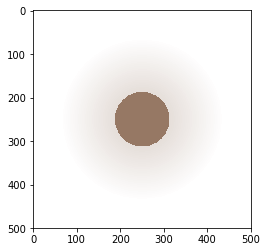

In [641]:
cv2.imwrite('imgTeste.png', img)
plt.imshow(img)